# Title: Variational Renormalization Group for Dissipative Spin-Cavity Systems: Periodic Pulses of Nonclassical Photons from Mesoscopic Spin Ensembles——PRL 121,133601

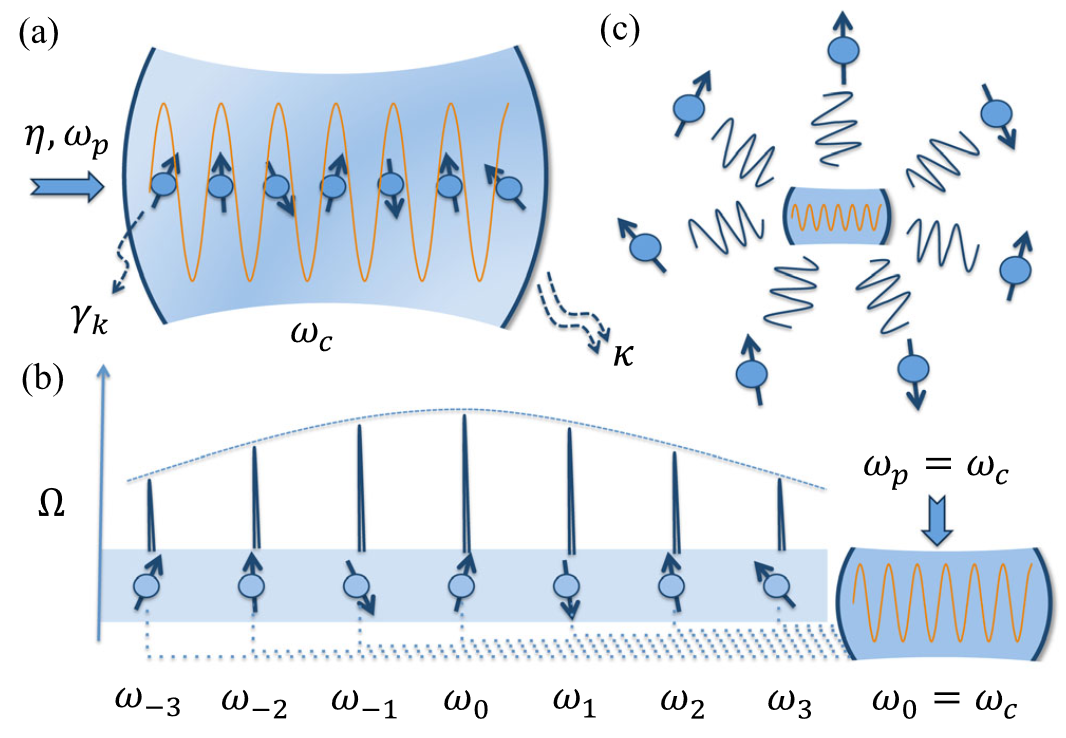

## The effective Hamiltonian

$$\mathcal{H}_{\text{eff}}=-\frac{i\kappa}{2}a^\dagger a+\sum_{k=1}^m{\left(\Delta_k-\frac{i\gamma_k}{2}\right) S^z_{k}}+\sum_{k=1}^m{g_k\left(S_k^\dagger a+a^\dagger S_k\right)},$$
where 
$$\Delta_k=\left[-\frac{m-1}{2}+(k-1) \right]\Delta\omega, g_k=\frac{\Omega_0}{\sqrt{N/m}}\exp[{-\Delta_k^2/2\lambda^2}].$$

## System parameters

$$N=105,m=7,\Delta\omega/2\pi=40\text{MHz},\lambda/2\pi=150\text{MHz},\Omega_0/2\pi=30\text{MHz},\kappa/2\pi=0.4\text{MHz},\gamma_k=\gamma=\kappa/40. $$

## The effective Hamiltonian in single-excitation subspace

$$
 \mathcal{H}_{\text{eff}}^{(1)}=\left[
 \begin{matrix}
   \mathcal{H}_c & G \\
   G^T & \mathcal{H}_e 
  \end{matrix}
  \right],
$$
where
$$\mathcal{H}_{c}=-\frac{i\kappa}{2},G=\left[\begin{matrix}\Omega_1,\Omega_2,\cdots,\Omega_m \end{matrix}\right],\mathcal{H}_e=\text{Diag}\left[\begin{matrix}\Delta_1-\frac{i\gamma}{2},\Delta_2-\frac{i\gamma}{2},\cdots,\Delta_m-\frac{i\gamma}{2}\end{matrix}\right].
$$

## The single-photon transmission spectrum

$$\left[\mathcal{H}_{\text{eff}}^{(1)}-\omega\right]^{-1}_{1,1}=\frac{1}{\tilde{\mathcal{H}}_c-G\tilde{\mathcal{H}}_e^{-1}G^T}=\frac{1}{\tilde{\mathcal{H}_{c}}-\sum_{k=1}^{m}{\frac{\Omega_k^2}{\tilde{\Delta}_k-i\gamma/2}}},$$
where $\Omega_k=g_k\sqrt{N/m}$.

Thus, the single-photon transmission spectrum is given by
$$T=\frac{\kappa^2}{4}\Big|\left[\begin{matrix}1,\pmb{0} \end{matrix} \right]\left[
 \begin{matrix}
   \mathcal{H}_c-\omega & G \\
   G^T & \mathcal{H}_e-\omega
  \end{matrix}
  \right]^{-1}\left[\begin{matrix}1\\\pmb{0}\end{matrix}\right]\Big|^2=\frac{\kappa^2}{4}\Big|\frac{1}{\omega+i\kappa/2+\sum_{k=1}^{m}{\frac{\Omega_k^2}{{\Delta}_k-\omega-i\gamma/2}}} \Big|^2$$

In [1]:
from qcs_phy import qcs

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# system fixed parameters
N = 105
m = 7

Np = int(N/m)
λ=9.5*np.pi
Δω=2*np.pi
Ω0=1.5*np.pi
κ=0.02*np.pi
γ = κ/40

ωd = np.linspace(-10*np.pi, 10*np.pi, 100000)

ωk, gk = [], []
for n in range(m):
    jdw = (n - int(m / 2)) * Δω
    gj = Ω0 * np.exp(-jdw ** 2 / (2 * λ ** 2))/np.sqrt(Np)
    ωk.append(jdw)
    gk.append(gj)

### The single-photon transmission and 2nd-order equal-time correlation function
$$g^{(2)}(0)=\frac{\langle a^\dagger a^\dagger a a\rangle_{\text{ss}}}{\langle a^\dagger a\rangle_{\text{ss}}^2}$$

In [4]:
# construct Input and Output channels
mode_c = [np.sqrt(κ/2), ("a", 0)]
Input = qcs.Input_channel("b", mode_c, ωd)
Output = qcs.Output_channel("c", mode_c)

# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF

Heff = []
Heff.append([-1j*κ/2, ("ad", 0), ("a", 0)])
for n in range(m):
    Heff.append([(ωk[n]-1j*γ/2), ("Sz N=%s"%Np, n)])
    Heff.append([gk[n], ("ad", 0), ("Sm N=%s"%Np, n)])
    Heff.append([gk[n], ("a", 0), ("Sp N=%s"%Np, n)])

result = qcs(Heff, Input, Output)
T = result.calculate_quantity("c")
g2_0 = result.calculate_quantity("cc")

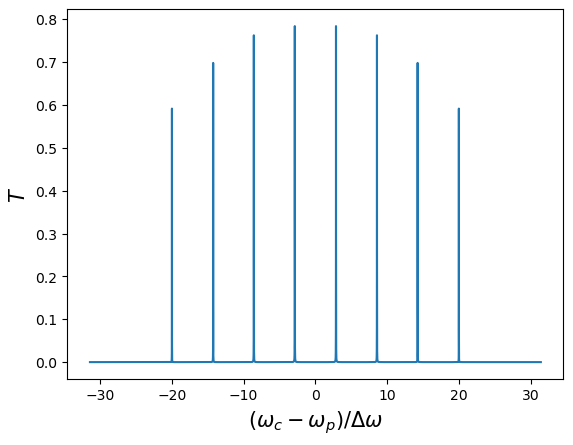

In [5]:
plt.plot(ωd, T)
plt.xlabel(r'$(\omega_c-\omega_p)/\Delta\omega$', fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r'$T$', fontdict={"family": "Times New Roman", "size": 15})
plt.show()

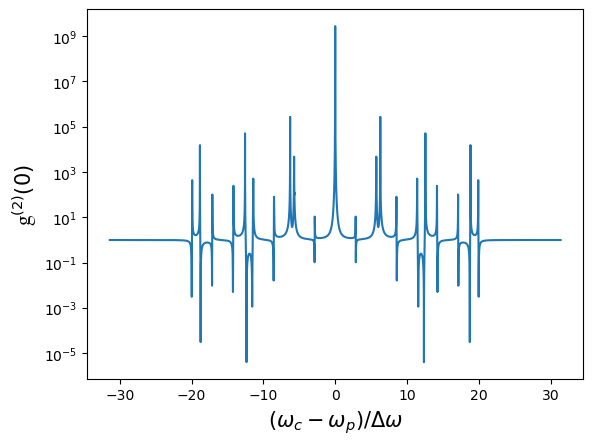

In [6]:
plt.semilogy(ωd, g2_0)
plt.xlabel(r'$(\omega_c-\omega_p)/\Delta\omega$', fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r'g$^{(2)}(0)$', fontdict={"family": "Times New Roman", "size": 15})
plt.show()

### The 2nd-order equal-time cross-correlation function
$$g^{(2)}_{k}(0)=\frac{\langle a^\dagger S_k^\dagger S_k a \rangle_{\text{ss}}}{\langle a^\dagger a\rangle_{\text{ss}}\langle S_k^\dagger S_k\rangle_{\text{ss}}}$$

<IPython.core.display.Javascript object>


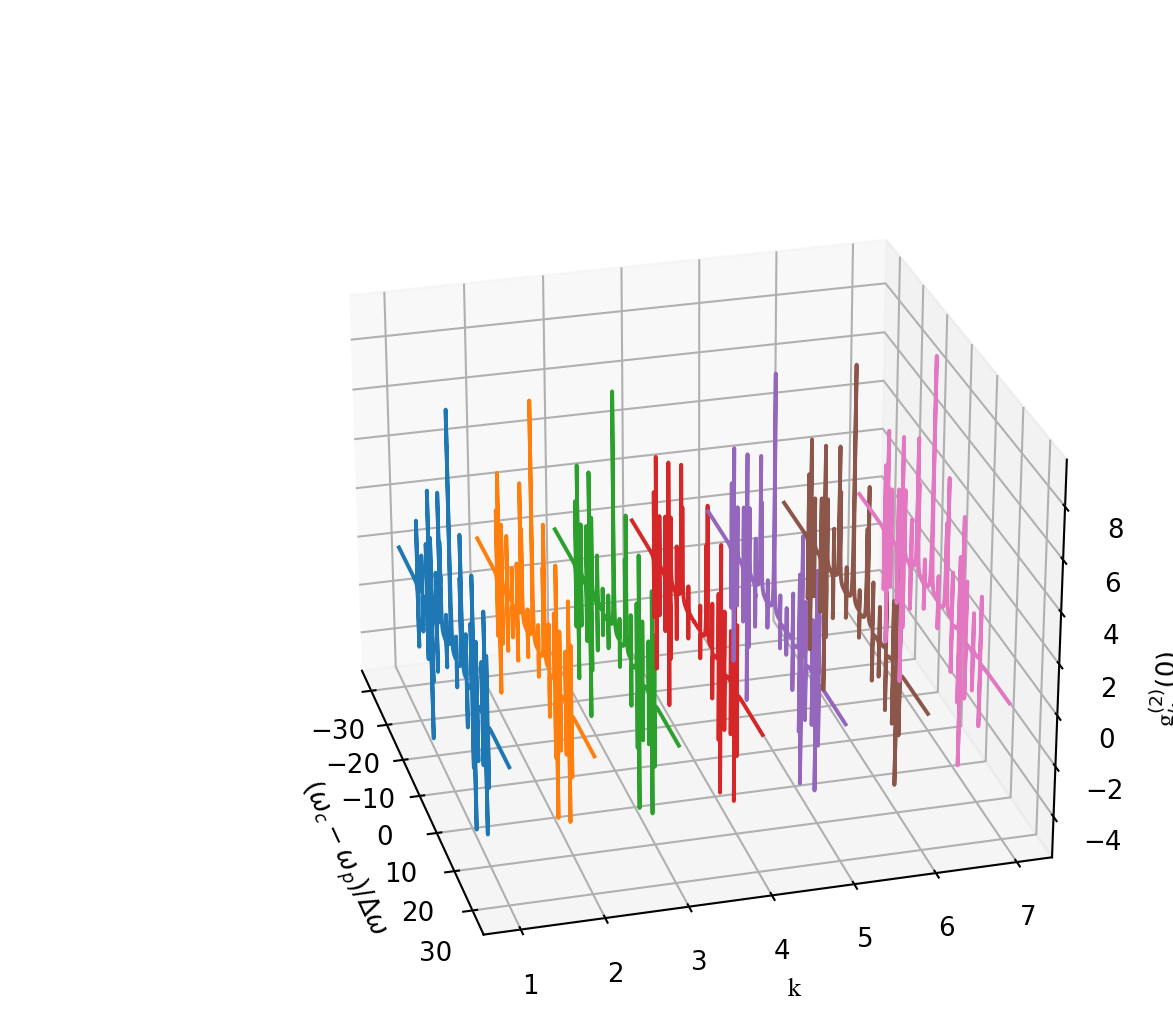

In [7]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')

y_k = np.ones((len(ωd)))

for kk in range(m):
    # construct Input and Output channels
    mode_c1 = [np.sqrt(κ/2), ("a", 0)]
    mode_c2 = [np.sqrt(γ/2), ("Sm N=%s"%Np, kk)]
    Input = qcs.Input_channel("b", mode_c1, ωd)
    Output1 = qcs.Output_channel("c1", mode_c1)
    Output2 = qcs.Output_channel("c2", mode_c2)


    Output = [Output1, Output2]
    # construct effective Hamiltonian and calculate 2nd-order equal-time cross-correlation function

    Heff = []
    Heff.append([-1j*κ/2, ("ad", 0), ("a", 0)])
    for n in range(m):
        Heff.append([(ωk[n]-1j*γ/2), ("Sz N=%s"%Np, n)])
        Heff.append([gk[n], ("ad", 0), ("Sm N=%s"%Np, n)])
        Heff.append([gk[n], ("a", 0), ("Sp N=%s"%Np, n)])
    result = qcs(Heff, Input, Output)
    g2_0_cross = result.calculate_quantity("c1c2")
    ax.plot3D(ωd, y_k * (kk+1),np.log10(g2_0_cross))
ax.set_xlabel(r'$(\omega_c-\omega_p)/\Delta\omega$', fontdict={"family": "Times New Roman", "size": 10})
ax.set_ylabel('k', fontdict={"family": "Times New Roman", "size": 10})
ax.set_zlabel(r'g$^{(2)}_k(0)$', fontdict={"family": "Times New Roman", "size": 10})
plt.show()